In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
import statsmodels.api as sm

c:\Users\pelik\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\pelik\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [170]:
data = pd.read_csv('data_ext_with_subs.csv',index_col=0)

In [171]:
data.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Primorsky', 'Tsentralny', 'Kalininsky', 'Krasnogvardeysky',
       'Admiralteysky', 'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky',
       'Vasileostrovsky', 'Krasnoselsky', 'Kirovsky', 'Moskovsky',
       'population', 'mean_distr_pps', 'metro_1km', 'metro_5km', 'metro_10km'],
      dtype='object')

In [78]:
for i in data.columns:
    print(f"{i}:{pearsonr(data['price_per_square'], data[i])}")

price_per_square:PearsonRResult(statistic=0.9999999999999997, pvalue=0.0)
squares:PearsonRResult(statistic=-0.11734039680720197, pvalue=6.417114412246304e-07)
max_floor:PearsonRResult(statistic=0.2022602973657715, pvalue=5.582834427692247e-18)
latitude:PearsonRResult(statistic=-0.06570525124170215, pvalue=0.005420058388835633)
longitude:PearsonRResult(statistic=0.06176014694143238, pvalue=0.008958274314402631)
Nevskii prospekt:PearsonRResult(statistic=-0.12217639296912275, pvalue=2.1611859234648797e-07)
parkings_1km:PearsonRResult(statistic=0.10768912367800786, pvalue=4.965141214139126e-06)
rent_per_m:PearsonRResult(statistic=-0.1227911097014038, pvalue=1.8762659580295052e-07)
Pushkinsky:PearsonRResult(statistic=-0.0568059085815199, pvalue=0.016233249564197673)
Primorsky:PearsonRResult(statistic=-0.0551642310871105, pvalue=0.019592743163682484)
Tsentralny:PearsonRResult(statistic=-0.053556132170568795, pvalue=0.023456451063983988)
Kalininsky:PearsonRResult(statistic=-0.0519814569243707

In [173]:
for i in data.columns:
    correlation, p_value = pearsonr(data['price_per_square'], data[i])
    if p_value >= 0.05:
        print(f"{i}: correlation={correlation}, p-value={p_value}")

population: correlation=-0.04522052002973912, p-value=0.05576731882815232
mean_distr_pps: correlation=-0.04427574412482357, p-value=0.06108973702047882


In [172]:
data = data[['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Primorsky', 'Tsentralny', 'Kalininsky', 'Krasnogvardeysky',
       'Admiralteysky', 'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky',
       'Vasileostrovsky', 'Krasnoselsky', 'Kirovsky',
       'population', 'mean_distr_pps', 'metro_5km', 'metro_10km']]

In [80]:
data.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Primorsky', 'Tsentralny', 'Kalininsky', 'Krasnogvardeysky',
       'Admiralteysky', 'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky',
       'Vasileostrovsky', 'Krasnoselsky', 'Kirovsky', 'Moskovsky',
       'population', 'mean_distr_pps', 'metro_1km', 'metro_5km', 'metro_10km'],
      dtype='object')

In [169]:
data.head()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,population,mean_distr_pps,metro_5km
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,80.31,78.76,13
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,29.70,27.95,15
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,51.54,49.84,20
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,296.86,298.00,2
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,208.71,208.15,4


In [174]:
data = data[data['price_per_square']>= 30000.0]

In [175]:
Q1 = data['price_per_square'].quantile(0.05)
Q3 = data['price_per_square'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price_per_square'] >= lower_bound) & (data['price_per_square'] <= upper_bound)]

# Строим Лес

In [176]:
df_1 = data.copy()

In [137]:
df_1.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Primorsky', 'Tsentralny', 'Kalininsky', 'Krasnogvardeysky',
       'Admiralteysky', 'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky',
       'Vasileostrovsky', 'Krasnoselsky', 'Kirovsky', 'Moskovsky',
       'population', 'mean_distr_pps', 'metro_1km', 'metro_5km', 'metro_10km'],
      dtype='object')

In [167]:
df_1

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,Pushkinsky,Primorsky,...,Petrogradsky,Vasileostrovsky,Krasnoselsky,Kirovsky,Moskovsky,population,mean_distr_pps,metro_1km,metro_5km,metro_10km
0,246533.6,1.0,3.0,30.335685,60.030204,5.01,57.0,19999.0,99.44,96.69,...,89.92,88.54,86.50,85.23,83.07,80.31,78.76,0,13,49
1,252437.2,2.0,1.0,30.317539,59.840659,4.96,53.0,8000.0,49.96,47.08,...,38.77,37.44,35.49,34.27,32.20,29.70,27.95,1,15,49
2,243426.8,2.0,6.0,30.299321,60.001671,4.55,74.0,7350.0,71.76,68.89,...,61.02,59.65,57.63,56.37,54.22,51.54,49.84,2,20,50
3,265627.4,2.0,6.0,30.444687,60.036034,14.26,24.0,7350.0,280.64,283.09,...,288.01,289.30,291.17,292.34,294.28,296.86,298.00,1,2,13
4,249730.0,3.5,5.0,30.488947,59.841089,18.81,31.0,25000.0,216.65,215.54,...,215.09,214.19,212.88,212.04,210.69,208.71,208.15,0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,270300.0,626.4,1.0,30.295422,59.999638,4.78,69.0,500000.0,73.20,70.53,...,64.41,63.05,61.05,59.80,57.71,54.97,53.57,2,20,49
1786,209860.0,650.0,5.0,30.261969,59.852335,8.29,32.0,422500.0,235.18,238.00,...,245.21,246.60,248.64,249.92,252.09,254.84,256.46,2,7,35
1787,209860.0,714.2,1.0,30.451406,59.892595,14.02,31.0,135698.0,291.56,294.40,...,301.73,303.13,305.17,306.45,308.62,311.37,312.99,0,9,20
1788,281300.0,715.6,1.0,30.386943,59.832059,8.70,59.0,135964.0,270.26,271.42,...,277.23,277.30,277.38,277.38,277.44,277.11,277.68,0,7,41


In [141]:
# df_2 = df_1[['squares', 'max_floor', 'latitude', 'longitude',
#        'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
#        'Primorsky', 'Tsentralny', 'Kalininsky', 'Krasnogvardeysky',
#        'Admiralteysky', 'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky',
#        'Vasileostrovsky', 'Krasnoselsky', 'Kirovsky', 'Moskovsky',
#        'metro_5km', 'metro_10km']].copy()
       
# df_3 = pd.merge(df_2, df_1, how='left')

In [182]:
X = df_1[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Primorsky', 'Tsentralny', 'Kalininsky', 'Krasnogvardeysky',
       'Admiralteysky', 'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky',
       'Vasileostrovsky', 'Krasnoselsky', 'Kirovsky', 'metro_5km', 'metro_10km']]
y = df_1['price_per_square']

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 999)

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9099526191220993

In [184]:
predictions1 = rfc.predict(X_train)
#Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_train, predictions1))
print(rmse)
print(mean_absolute_error(y_train, predictions1))
print(mean_absolute_percentage_error(y_train, predictions1))

21280.658342507755
15558.016689079537
0.08093341152422803


In [185]:
predictions2 = rfc.predict(X_test)
#Calculate the root mean squared error
display(rfc.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print(rmse)
print(mean_absolute_error(y_test, predictions2))
print(mean_absolute_percentage_error(y_test, predictions2))

0.39773927352616134

55059.100132540814
41175.26308286778
0.19816720184116215


In [52]:
X_train

,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_m,metro_5km
1216,116.00,13.0,30.413317,59.953340,9.62,26.0,406350.0,7
82,18.00,4.0,30.103452,59.836486,25.18,23.0,45536.2,0
1491,155.90,5.0,30.465348,59.919581,15.38,44.0,449993.0,7
728,76.13,1.0,30.351280,59.967502,3.16,57.0,130418.0,30
1137,110.00,4.0,30.323504,59.917042,1.03,38.0,246800.0,31
...,...,...,...,...,...,...,...,...
1736,291.00,18.0,30.243015,60.073876,11.42,30.0,378300.0,3
481,59.00,27.0,30.340985,60.075016,7.44,51.0,104392.0,7
869,86.10,14.0,30.368563,59.885142,5.32,17.0,155000.0,19
348,48.70,7.0,30.446474,59.873266,13.72,19.0,69383.0,9


In [147]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                  importance
squares             0.165642
max_floor           0.126279
parkings_1km        0.122324
longitude           0.117823
rent_per_m          0.104704
latitude            0.078050
Nevskii prospekt    0.057965
metro_5km           0.040486
metro_10km          0.036087
Pushkinsky          0.021567
Moskovsky           0.016594
Primorsky           0.013261
Tsentralny          0.012689
Kirovsky            0.009907
Kalininsky          0.009509
Krasnoselsky        0.009291
Krasnogvardeysky    0.009080
Petrogradsky        0.008546
Vasileostrovsky     0.008509
Nevsky              0.008360
Vyborgsky           0.008327
Frunzensky          0.007756
Admiralteysky       0.007245


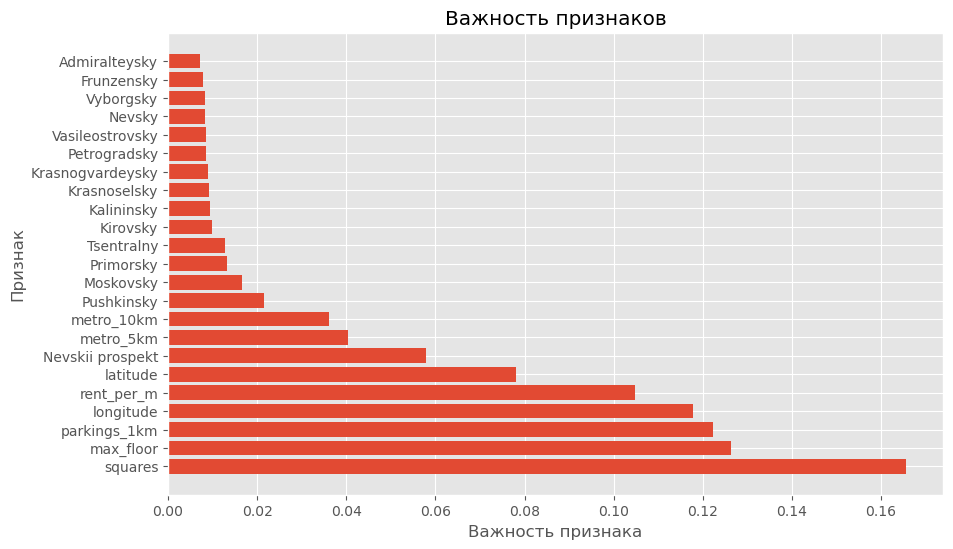

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()

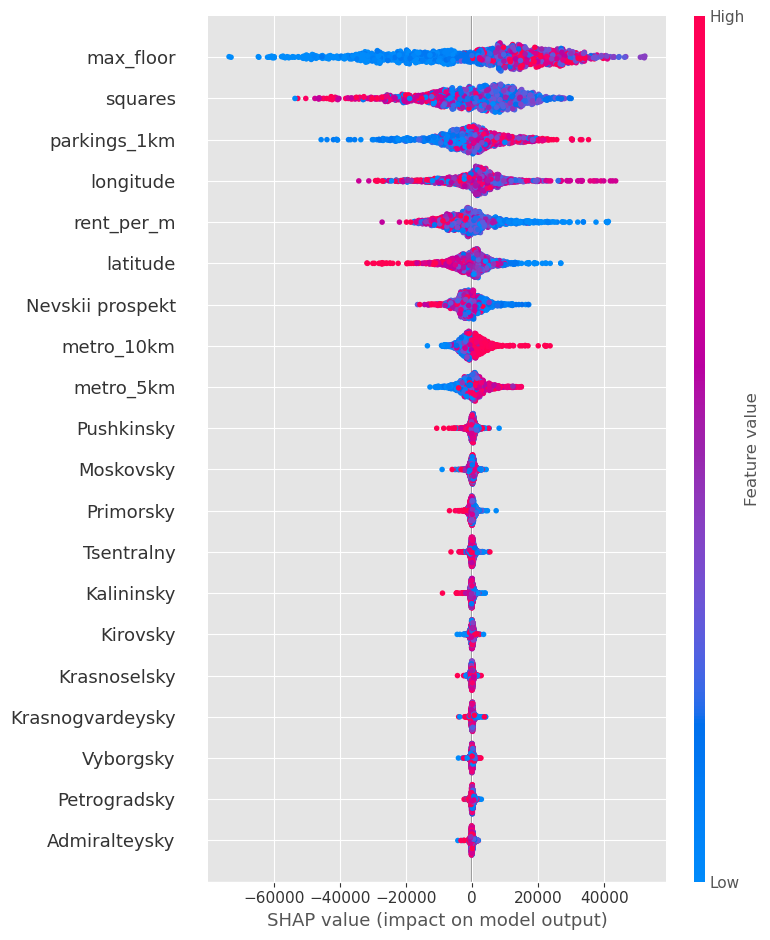

In [149]:
import shap

explainer = shap.Explainer(rfc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [124]:
# Load libraries
import os
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [150]:
X = df_3[['squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_m', 'Pushkinsky',
       'Primorsky', 'Tsentralny', 'Kalininsky', 'Krasnogvardeysky',
       'Admiralteysky', 'Vyborgsky', 'Frunzensky', 'Nevsky', 'Petrogradsky',
       'Vasileostrovsky', 'Krasnoselsky', 'Kirovsky', 'Moskovsky',
       'metro_5km', 'metro_10km']]
Y = df_3['price_per_square']

In [151]:
# Split-out validation dataset
array = data.values

validation_size = 0.50
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### 4. Evaluate Algorithms: Baseline

In [152]:
# Test options and evaluation metric
num_folds = 2
seed = 999
scoring = 'neg_mean_absolute_percentage_error'

In [153]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.295055 (0.026070)
LASSO: -0.287513 (0.018116)
EN: -0.286385 (0.018253)
KNN: nan (nan)
CART: -0.313028 (0.021788)
SVR: -0.303600 (0.016996)


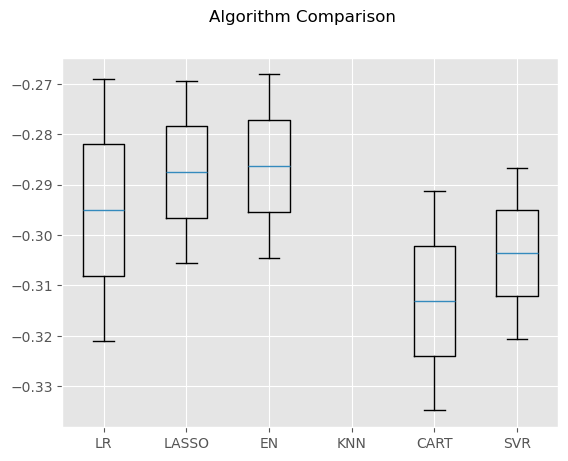

In [154]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Evaluate Algorithms: Standardize Data

In [155]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.295055 (0.026070)
ScaledLASSO: -0.287510 (0.018116)
ScaledEN: -0.288942 (0.016796)
ScaledKNN: nan (nan)
ScaledCART: -0.316214 (0.025529)
ScaledSVR: -0.303594 (0.016998)


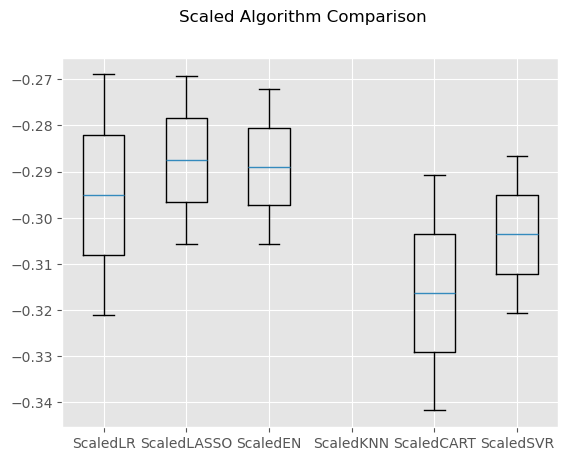

In [156]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 6. Algorithm Tuning

In [157]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: nan using {'n_neighbors': 1}
nan (nan) with: {'n_neighbors': 1}
nan (nan) with: {'n_neighbors': 3}
nan (nan) with: {'n_neighbors': 5}
nan (nan) with: {'n_neighbors': 7}
nan (nan) with: {'n_neighbors': 9}
nan (nan) with: {'n_neighbors': 11}
nan (nan) with: {'n_neighbors': 13}
nan (nan) with: {'n_neighbors': 15}
nan (nan) with: {'n_neighbors': 17}
nan (nan) with: {'n_neighbors': 19}
nan (nan) with: {'n_neighbors': 21}


### 7. Ensemble Methods

In [158]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.274895 (0.013086)
ScaledGBM: -0.258554 (0.023255)
ScaledRF: -0.258268 (0.028103)
ScaledET: -0.273600 (0.010881)


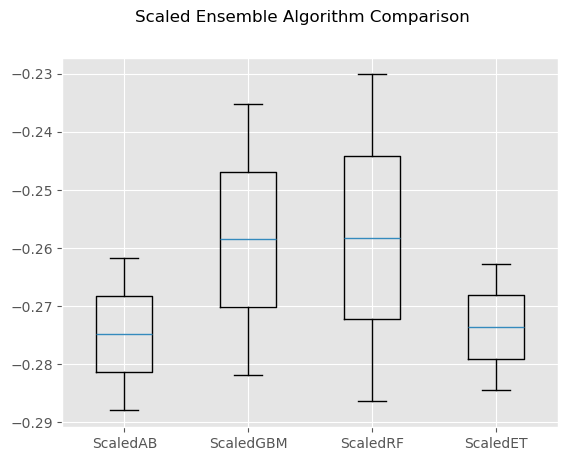

In [159]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [132]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [133]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.255538 using {'n_estimators': 200}
-0.259188 (0.005265) with: {'n_estimators': 50}
-0.256488 (0.005616) with: {'n_estimators': 100}
-0.255969 (0.005142) with: {'n_estimators': 150}
-0.255538 (0.004240) with: {'n_estimators': 200}
-0.255597 (0.003456) with: {'n_estimators': 250}
-0.256477 (0.003550) with: {'n_estimators': 300}
-0.256669 (0.003395) with: {'n_estimators': 350}
-0.256879 (0.004097) with: {'n_estimators': 400}


### 8. Finalize Model

In [160]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=200)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=200, random_state=999)

In [161]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))
print(mean_absolute_error(Y_validation, predictions))
print(mean_absolute_percentage_error(Y_validation, predictions))

3631373927.394905
46445.75231231072
0.22512164254725187
